In [1]:
# 导入相关库
from xgboost import XGBRegressor  # 导入XGBoost回归器
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归器
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split as TTS # 导入交叉验证、交叉验证评分及数据集划分
from sklearn.metrics import mean_squared_error  # 导入均方误差计算的方法

import pandas as pd  # 导入处理数据的pandas库
import numpy as np  # 导入数值计算库Numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from time import time  # 导入时间模块中的time函数
import datetime  # 导入日期时间模块

In [2]:
#读取文件
file_path = "D:\data\heart+disease\processed.cleveland.data"
data = pd.read_csv(file_path, delimiter=',')
print(data)


     63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0    67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1    67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2    37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3    41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4    56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   
..    ...  ...    ...    ...    ...    ...  ...    ...  ...  ...  ...   ...   
297  45.0  1.0    1.0  110.0  264.0    0.0  0.0  132.0  0.0  1.2  2.0   0.0   
298  68.0  1.0    4.0  144.0  193.0    1.0  0.0  141.0  0.0  3.4  2.0   2.0   
299  57.0  1.0    4.0  130.0  131.0    0.0  0.0  115.0  1.0  1.2  2.0   1.0   
300  57.0  0.0    2.0  130.0  236.0    0.0  2.0  174.0  0.0  0.0  2.0   1.0   
301  38.0  1.0    3.0  138.0  175.0    0.0  0.0  173.0  0.0  0.0  1.0     ?   

     6.0  0  
0    3.0  2  
1    7.0  1  
2    3.0 

In [3]:
# 替换'MissingValue'为NaN
data.replace('?', np.nan, inplace=True)
# 转换数据类型
data = data.astype(float)

In [4]:
# 设置特征和标签
X = data.iloc[:, :13]  # 前13列特征
y = data.iloc[:, 13]   # 第14列标签

In [5]:
# 打印特征
print("特征:")
print(X)

特征:
     63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0  0.0.1  \
0    67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0    3.0   
1    67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0    2.0   
2    37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0    0.0   
3    41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0    0.0   
4    56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0    0.0   
..    ...  ...    ...    ...    ...    ...  ...    ...  ...  ...  ...    ...   
297  45.0  1.0    1.0  110.0  264.0    0.0  0.0  132.0  0.0  1.2  2.0    0.0   
298  68.0  1.0    4.0  144.0  193.0    1.0  0.0  141.0  0.0  3.4  2.0    2.0   
299  57.0  1.0    4.0  130.0  131.0    0.0  0.0  115.0  1.0  1.2  2.0    1.0   
300  57.0  0.0    2.0  130.0  236.0    0.0  2.0  174.0  0.0  0.0  2.0    1.0   
301  38.0  1.0    3.0  138.0  175.0    0.0  0.0  173.0  0.0  0.0  1.0    NaN   

     6.0  
0    3.0  
1    7.0  
2 

In [6]:
# 打印标签
print("标签:")
print(y)


标签:
0      2.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
297    1.0
298    2.0
299    3.0
300    1.0
301    0.0
Name: 0, Length: 302, dtype: float64


In [58]:
import xgboost as xgb

#随机分割训练数据集和测试数据集
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.4, random_state=42)

# 转换为DMatrix，XGBoost的专用数据结构
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

In [8]:
print("y_train:", y_train)

y_train: 206    3.0
287    0.0
170    0.0
234    3.0
211    0.0
      ... 
188    2.0
71     1.0
106    1.0
270    0.0
102    0.0
Name: 0, Length: 181, dtype: float64


In [30]:
from sklearn.metrics import accuracy_score
param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.3,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.4,
    'colsample_bytree': 0.4,
    'gamma': 0,
    'lambda': 2,
    'alpha': 2,
    'eval_metric': 'logloss',
    'seed': 42
}

num_round = 75
bst = xgb.train(param, dtrain, num_round)


# 预测
Tain_preds = bst.predict(dtrain)
Test_preds = bst.predict(dtest)

# 计算准确率
train_accuracy = accuracy_score(y_train, Tain_preds)
print("Train data accuracy: {:.2f}%".format(train_accuracy * 100))
test_accuracy = accuracy_score(y_test, Test_preds)
print("Test data Accuracy: {:.2f}%".format(test_accuracy * 100))

Train data accuracy: 81.77%
Test data Accuracy: 59.50%


In [59]:
from sklearn.metrics import accuracy_score
param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.32,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.6,
    'colsample_bytree': 0.3,
    'gamma': 0,
    'lambda': 2.2,
    'alpha': 3.3,
    'eval_metric': 'logloss',
    'seed': 42
}

num_round = 85
bst = xgb.train(param, dtrain, num_round)


# 预测
Tain_preds = bst.predict(dtrain)
Test_preds = bst.predict(dtest)

# 计算准确率
train_accuracy = accuracy_score(y_train, Tain_preds)
print("Train data accuracy: {:.2f}%".format(train_accuracy * 100))
test_accuracy = accuracy_score(y_test, Test_preds)
print("Test data Accuracy: {:.2f}%".format(test_accuracy * 100))

Train data accuracy: 75.14%
Test data Accuracy: 61.16%


Gamma: 0.0, Accuracy: 0.6033057851239669
Gamma: 0.5263157894736842, Accuracy: 0.5867768595041323
Gamma: 1.0526315789473684, Accuracy: 0.5619834710743802
Gamma: 1.5789473684210527, Accuracy: 0.5537190082644629
Gamma: 2.1052631578947367, Accuracy: 0.5619834710743802
Gamma: 2.631578947368421, Accuracy: 0.5619834710743802
Gamma: 3.1578947368421053, Accuracy: 0.5619834710743802
Gamma: 3.6842105263157894, Accuracy: 0.5619834710743802
Gamma: 4.2105263157894735, Accuracy: 0.5454545454545454
Gamma: 4.7368421052631575, Accuracy: 0.5371900826446281
Gamma: 5.263157894736842, Accuracy: 0.5371900826446281
Gamma: 5.789473684210526, Accuracy: 0.5371900826446281
Gamma: 6.315789473684211, Accuracy: 0.5371900826446281
Gamma: 6.842105263157895, Accuracy: 0.5371900826446281
Gamma: 7.368421052631579, Accuracy: 0.5371900826446281
Gamma: 7.894736842105263, Accuracy: 0.5371900826446281
Gamma: 8.421052631578947, Accuracy: 0.5371900826446281
Gamma: 8.947368421052632, Accuracy: 0.5371900826446281
Gamma: 9.4736842

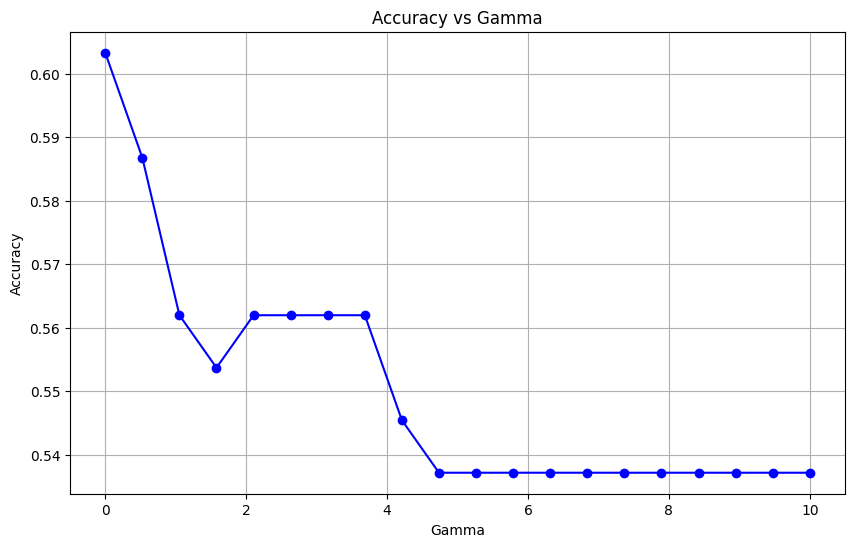

In [15]:
from sklearn.metrics import accuracy_score
# Step 3: 定义参数范围
gamma_values = np.linspace(0, 10, 20)  # 生成从0到10的20个均匀分布的值
accuracies = []


for gamma in gamma_values:
    param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.32,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.4,
    'colsample_bytree': 0.4,
    'gamma': gamma,
    'lambda': 2,
    'alpha': 2,
    'eval_metric': 'logloss',
    'seed': 42
}
    
    num_round = 75
    
    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_pred = bst.predict(dtest)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Gamma: {gamma}, Accuracy: {accuracy}")


# Step 5: 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Gamma: 0.00, Eta: 0.01, Accuracy: 0.5455
Gamma: 0.00, Eta: 0.04, Accuracy: 0.5455
Gamma: 0.00, Eta: 0.06, Accuracy: 0.5537
Gamma: 0.00, Eta: 0.09, Accuracy: 0.5537
Gamma: 0.00, Eta: 0.11, Accuracy: 0.5537
Gamma: 0.00, Eta: 0.14, Accuracy: 0.5702
Gamma: 0.00, Eta: 0.16, Accuracy: 0.5868
Gamma: 0.00, Eta: 0.19, Accuracy: 0.5868
Gamma: 0.00, Eta: 0.22, Accuracy: 0.5868
Gamma: 0.00, Eta: 0.24, Accuracy: 0.5785
Gamma: 0.00, Eta: 0.27, Accuracy: 0.5868
Gamma: 0.00, Eta: 0.29, Accuracy: 0.5868
Gamma: 0.00, Eta: 0.32, Accuracy: 0.5950
Gamma: 0.00, Eta: 0.35, Accuracy: 0.5785
Gamma: 0.00, Eta: 0.37, Accuracy: 0.5620
Gamma: 0.00, Eta: 0.40, Accuracy: 0.5620
Gamma: 0.00, Eta: 0.42, Accuracy: 0.5537
Gamma: 0.00, Eta: 0.45, Accuracy: 0.5537
Gamma: 0.00, Eta: 0.47, Accuracy: 0.5620
Gamma: 0.00, Eta: 0.50, Accuracy: 0.5455
Gamma: 0.53, Eta: 0.01, Accuracy: 0.5372
Gamma: 0.53, Eta: 0.04, Accuracy: 0.5537
Gamma: 0.53, Eta: 0.06, Accuracy: 0.5455
Gamma: 0.53, Eta: 0.09, Accuracy: 0.5455
Gamma: 0.53, Eta

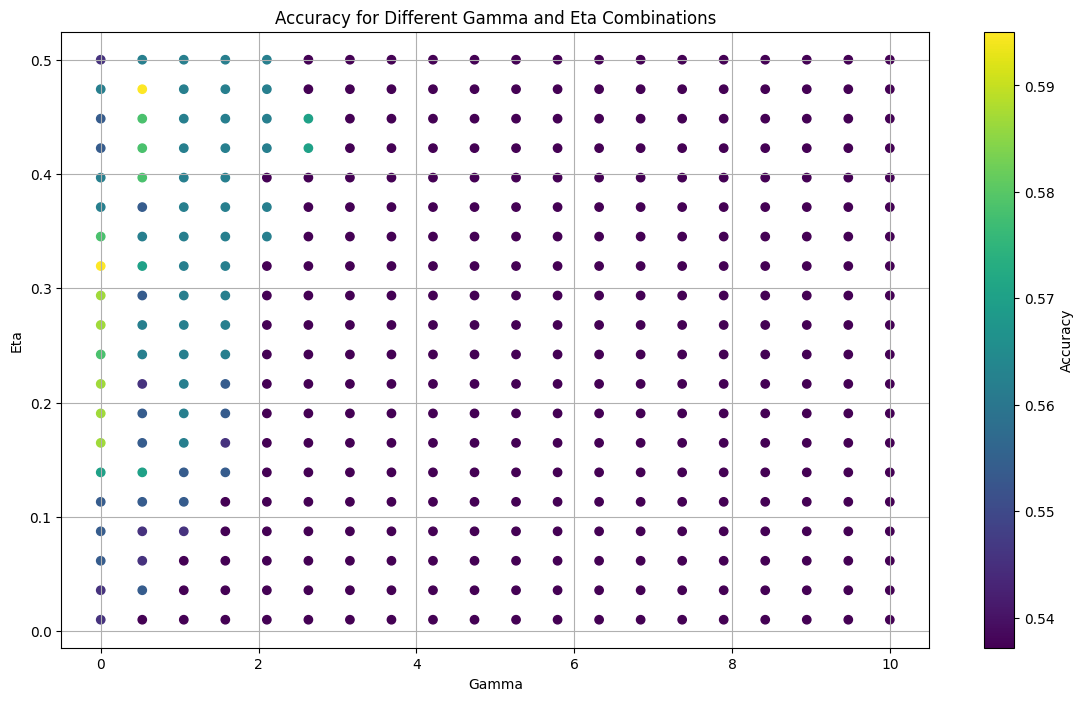

In [31]:
from itertools import product

# Step 3: 定义参数范围
gamma_values = np.linspace(0, 10, 20)  # 生成从0到10的20个均匀分布的gamma值
eta_values = np.linspace(0.01, 0.5, 20)  # 生成从0.01到0.5的20个均匀分布的eta值

# 创建 gamma 和 eta 组合的笛卡尔积
param_combinations = list(product(gamma_values, eta_values))

accuracies = []

for gamma, eta in param_combinations:
    param = {
        'booster': 'gbtree',
        'objective': 'multi:softmax',
        'num_class': 5,
        'eta': eta,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.22,
        'colsample_bytree': 0.38,
        'gamma': gamma,
        'lambda': 2,
        'alpha': 2,
        'eval_metric': 'logloss',
        'seed': 42
    }
    
    num_round = 75
    
    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_pred = bst.predict(dtest)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((gamma, eta, accuracy))
    print(f"Gamma: {gamma:.2f}, Eta: {eta:.2f}, Accuracy: {accuracy:.4f}")

# 将结果转换为numpy数组，便于处理
gamma_values, eta_values, accuracy_values = zip(*accuracies)

# Step 5: 分析结果并绘制图形
plt.figure(figsize=(14, 8))
scatter = plt.scatter(gamma_values, eta_values, c=accuracy_values, cmap='viridis', marker='o')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.title('Accuracy for Different Gamma and Eta Combinations')
plt.xlabel('Gamma')
plt.ylabel('Eta')
plt.grid(True)
plt.show()

Subsample: 0.10, Colsample_bytree: 0.10, Accuracy: 0.5372
Subsample: 0.10, Colsample_bytree: 0.15, Accuracy: 0.5372
Subsample: 0.10, Colsample_bytree: 0.19, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.24, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.29, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.34, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.38, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.43, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.48, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.53, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.57, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.62, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.67, Accuracy: 0.5537
Subsample: 0.10, Colsample_bytree: 0.72, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.76, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.81, Accuracy: 0.5455
Subsample: 0.10, Colsample_bytree: 0.86, Accuracy: 0.5620
Subsample: 0.1

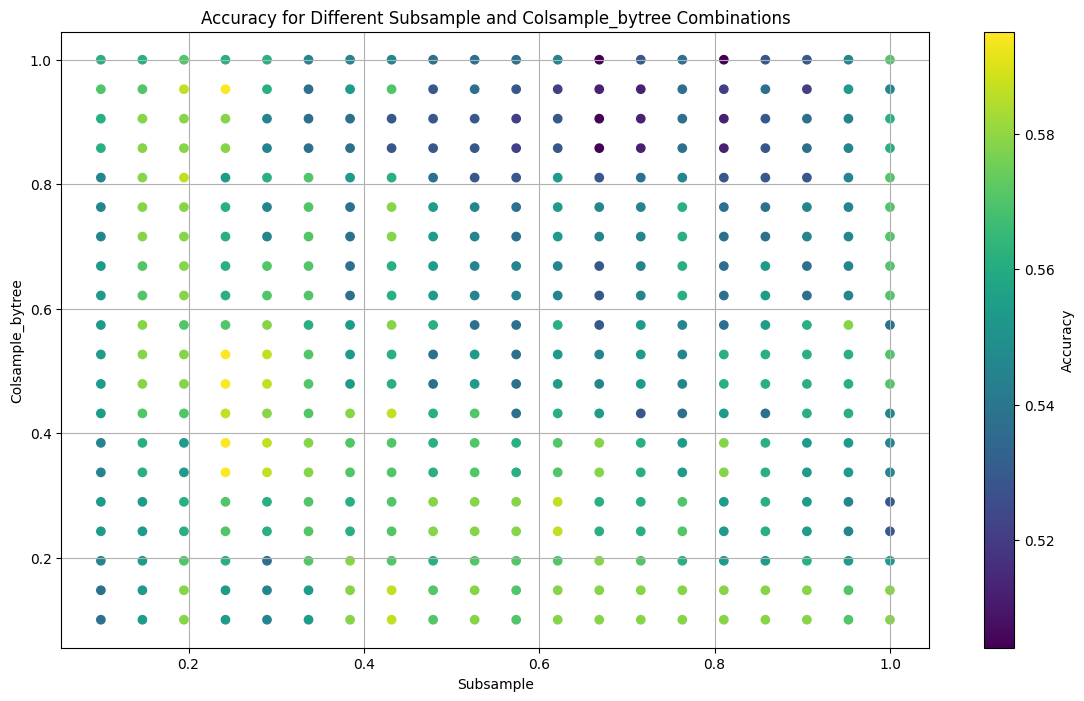

In [24]:

# Step 3: 定义参数范围
subsample_values = np.linspace(0.1, 1.0, 20)  # 生成从0.1到1.0的20个均匀分布的subsample值
colsample_bytree_values = np.linspace(0.1, 1.0, 20)  # 生成从0.1到1.0的20个均匀分布的colsample_bytree值

# 创建 subsample 和 colsample_bytree 组合的笛卡尔积
param_combinations = list(product(subsample_values, colsample_bytree_values))

accuracies = []

for subsample, colsample_bytree in param_combinations:
    param = {
        'booster': 'gbtree',
        'objective': 'multi:softmax',
        'num_class': 5,
        'eta': 0.3,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': 0,
        'lambda': 2,
        'alpha': 2,
        'eval_metric': 'logloss',
        'seed': 42
    }
    
    num_round = 75
    
    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_pred = bst.predict(dtest)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((subsample, colsample_bytree, accuracy))
    print(f"Subsample: {subsample:.2f}, Colsample_bytree: {colsample_bytree:.2f}, Accuracy: {accuracy:.4f}")

# 将结果转换为numpy数组，便于处理
subsample_values, colsample_bytree_values, accuracy_values = zip(*accuracies)

# Step 5: 分析结果并绘制图形
plt.figure(figsize=(14, 8))
scatter = plt.scatter(subsample_values, colsample_bytree_values, c=accuracy_values, cmap='viridis', marker='o')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.title('Accuracy for Different Subsample and Colsample_bytree Combinations')
plt.xlabel('Subsample')
plt.ylabel('Colsample_bytree')
plt.grid(True)
plt.show()

Lambda: 0.00, Alpha: 0.00, Accuracy: 0.5124
Lambda: 0.00, Alpha: 0.53, Accuracy: 0.5620
Lambda: 0.00, Alpha: 1.05, Accuracy: 0.5620
Lambda: 0.00, Alpha: 1.58, Accuracy: 0.5620
Lambda: 0.00, Alpha: 2.11, Accuracy: 0.5702
Lambda: 0.00, Alpha: 2.63, Accuracy: 0.5950
Lambda: 0.00, Alpha: 3.16, Accuracy: 0.5785
Lambda: 0.00, Alpha: 3.68, Accuracy: 0.5702
Lambda: 0.00, Alpha: 4.21, Accuracy: 0.5620
Lambda: 0.00, Alpha: 4.74, Accuracy: 0.5455
Lambda: 0.00, Alpha: 5.26, Accuracy: 0.5537
Lambda: 0.00, Alpha: 5.79, Accuracy: 0.5372
Lambda: 0.00, Alpha: 6.32, Accuracy: 0.5372
Lambda: 0.00, Alpha: 6.84, Accuracy: 0.5372
Lambda: 0.00, Alpha: 7.37, Accuracy: 0.5372
Lambda: 0.00, Alpha: 7.89, Accuracy: 0.5372
Lambda: 0.00, Alpha: 8.42, Accuracy: 0.5372
Lambda: 0.00, Alpha: 8.95, Accuracy: 0.5372
Lambda: 0.00, Alpha: 9.47, Accuracy: 0.5372
Lambda: 0.00, Alpha: 10.00, Accuracy: 0.5372
Lambda: 0.53, Alpha: 0.00, Accuracy: 0.4959
Lambda: 0.53, Alpha: 0.53, Accuracy: 0.5455
Lambda: 0.53, Alpha: 1.05, Accu

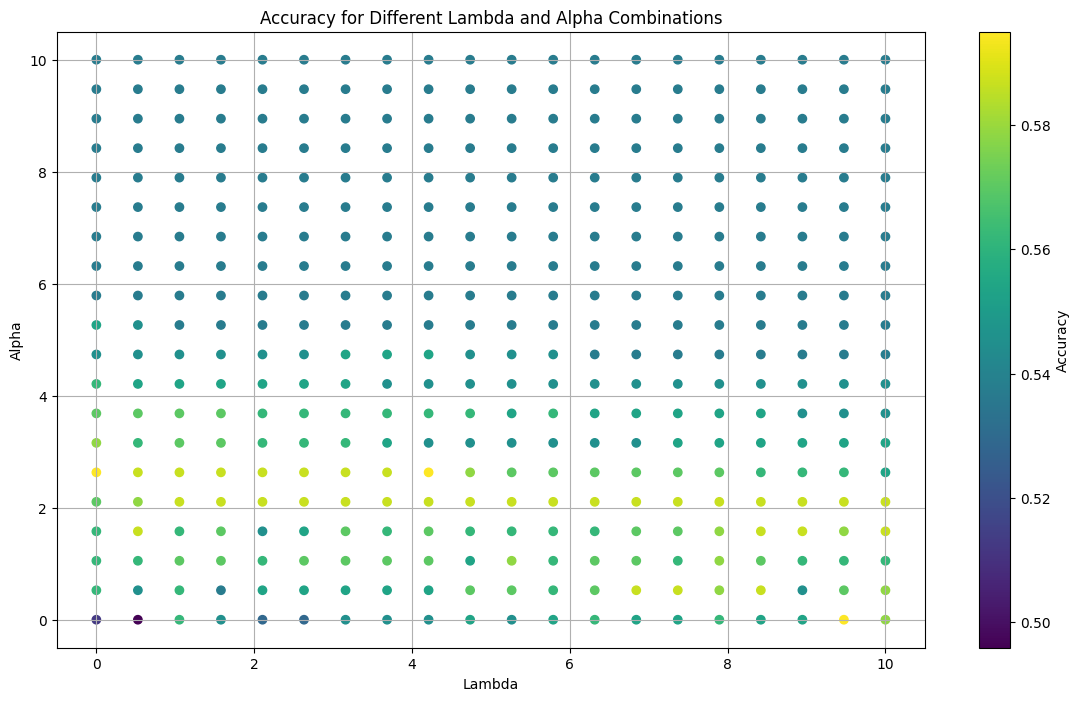

In [33]:
# Step 3: 定义参数范围
lambda_values = np.linspace(0, 10, 20)  # 生成从0到10的20个均匀分布的lambda值
alpha_values = np.linspace(0, 10, 20)  # 生成从0到10的20个均匀分布的alpha值

# 创建 lambda 和 alpha 组合的笛卡尔积
param_combinations = list(product(lambda_values, alpha_values))

accuracies = []

for lambda_val, alpha_val in param_combinations:
    param = {
        'booster': 'gbtree',
        'objective': 'multi:softmax',
        'num_class': 5,
        'eta': 0.31,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.22,
        'colsample_bytree': 0.38,
        'gamma': 0,
        'lambda': lambda_val,
        'alpha': alpha_val,
        'eval_metric': 'logloss',
        'seed': 42
    }
    
    num_round = 75
    
    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_pred = bst.predict(dtest)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((lambda_val, alpha_val, accuracy))
    print(f"Lambda: {lambda_val:.2f}, Alpha: {alpha_val:.2f}, Accuracy: {accuracy:.4f}")

# 将结果转换为numpy数组，便于处理
lambda_values, alpha_values, accuracy_values = zip(*accuracies)

# Step 5: 分析结果并绘制图形
plt.figure(figsize=(14, 8))
scatter = plt.scatter(lambda_values, alpha_values, c=accuracy_values, cmap='viridis', marker='o')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.title('Accuracy for Different Lambda and Alpha Combinations')
plt.xlabel('Lambda')
plt.ylabel('Alpha')
plt.grid(True)
plt.show()

Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.10, Accuracy: 0.5785
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.20, Accuracy: 0.5702
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.30, Accuracy: 0.5785
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.40, Accuracy: 0.5702
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.50, Accuracy: 0.5620
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.60, Accuracy: 0.5620
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.70, Accuracy: 0.5868
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.80, Accuracy: 0.5702
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 0.90, Accuracy: 0.5537
Lambda: 0.00, Alpha: 0.00, Subsample: 0.10, Colsample_bytree: 1.00, Accuracy: 0.5372
Lambda: 0.00, Alpha: 0.00, Subsample: 0.20, Colsample_bytree: 0.10, Accuracy: 0.5537
Lambda: 0.00, Alpha: 0.00, Subsample: 0.20, Colsample_bytree: 0.2

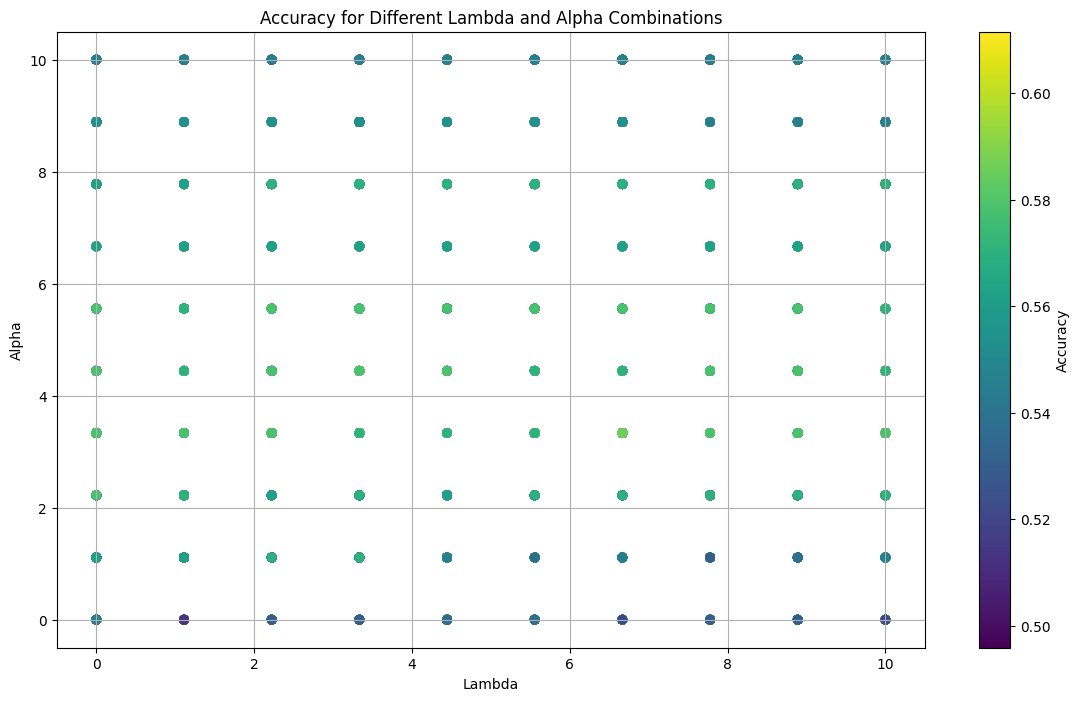

In [34]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from itertools import product

# 假设您已经加载了您的数据
# dtrain = ...
# dtest = ...
# y_test = ...

# Step 3: 定义参数范围
lambda_values = np.linspace(0, 10, 10)  # 生成从0到10的10个均匀分布的lambda值
alpha_values = np.linspace(0, 10, 10)  # 生成从0到10的10个均匀分布的alpha值
subsample_values = np.linspace(0.1, 1.0, 10)  # 生成从0.1到1.0的10个均匀分布的subsample值
colsample_bytree_values = np.linspace(0.1, 1.0, 10)  # 生成从0.1到1.0的10个均匀分布的colsample_bytree值

# 创建 lambda, alpha, subsample 和 colsample_bytree 组合的笛卡尔积
param_combinations = list(product(lambda_values, alpha_values, subsample_values, colsample_bytree_values))

best_accuracy = 0
best_params = None
accuracies = []

for lambda_val, alpha_val, subsample_val, colsample_bytree_val in param_combinations:
    param = {
        'booster': 'gbtree',
        'objective': 'multi:softmax',
        'num_class': 5,
        'eta': 0.25,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': subsample_val,
        'colsample_bytree': colsample_bytree_val,
        'gamma': 0,
        'lambda': lambda_val,
        'alpha': alpha_val,
        'eval_metric': 'logloss',
        'seed': 42
    }
    
    num_round = 75
    
    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_pred = bst.predict(dtest)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((lambda_val, alpha_val, subsample_val, colsample_bytree_val, accuracy))
    print(f"Lambda: {lambda_val:.2f}, Alpha: {alpha_val:.2f}, Subsample: {subsample_val:.2f}, Colsample_bytree: {colsample_bytree_val:.2f}, Accuracy: {accuracy:.4f}")

    # 如果当前准确率高于最好准确率，则更新最好准确率与参数
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = (lambda_val, alpha_val, subsample_val, colsample_bytree_val)

# 输出最佳参数组合及其准确率
print(f"\nBest Parameters: Lambda: {best_params[0]}, Alpha: {best_params[1]}, Subsample: {best_params[2]}, Colsample_bytree: {best_params[3]} with Accuracy: {best_accuracy:.4f}")

# 将结果转换为numpy数组，便于处理
lambda_values, alpha_values, subsample_values, colsample_bytree_values, accuracy_values = zip(*accuracies)

# Step 5: 分析结果并绘制图形（这里只能选择两个维度绘制，选择最合适的两个维度）
plt.figure(figsize=(14, 8))
scatter = plt.scatter(lambda_values, alpha_values, c=accuracy_values, cmap='viridis', marker='o')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.title('Accuracy for Different Lambda and Alpha Combinations')
plt.xlabel('Lambda')
plt.ylabel('Alpha')
plt.grid(True)
plt.show()

Test size: 0.10 | Train Accuracy: 0.7417 | Test Accuracy: 0.5484
Test size: 0.11 | Train Accuracy: 0.7500 | Test Accuracy: 0.5294
Test size: 0.12 | Train Accuracy: 0.7283 | Test Accuracy: 0.4865
Test size: 0.13 | Train Accuracy: 0.7557 | Test Accuracy: 0.5000
Test size: 0.14 | Train Accuracy: 0.7490 | Test Accuracy: 0.4884
Test size: 0.15 | Train Accuracy: 0.7344 | Test Accuracy: 0.5435
Test size: 0.16 | Train Accuracy: 0.7708 | Test Accuracy: 0.5306
Test size: 0.17 | Train Accuracy: 0.7320 | Test Accuracy: 0.5385
Test size: 0.18 | Train Accuracy: 0.7733 | Test Accuracy: 0.5273
Test size: 0.19 | Train Accuracy: 0.7541 | Test Accuracy: 0.5000
Test size: 0.20 | Train Accuracy: 0.7593 | Test Accuracy: 0.5246
Test size: 0.21 | Train Accuracy: 0.7479 | Test Accuracy: 0.5469
Test size: 0.22 | Train Accuracy: 0.7574 | Test Accuracy: 0.5373
Test size: 0.23 | Train Accuracy: 0.7500 | Test Accuracy: 0.5429
Test size: 0.24 | Train Accuracy: 0.7598 | Test Accuracy: 0.5753
Test size: 0.25 | Train A

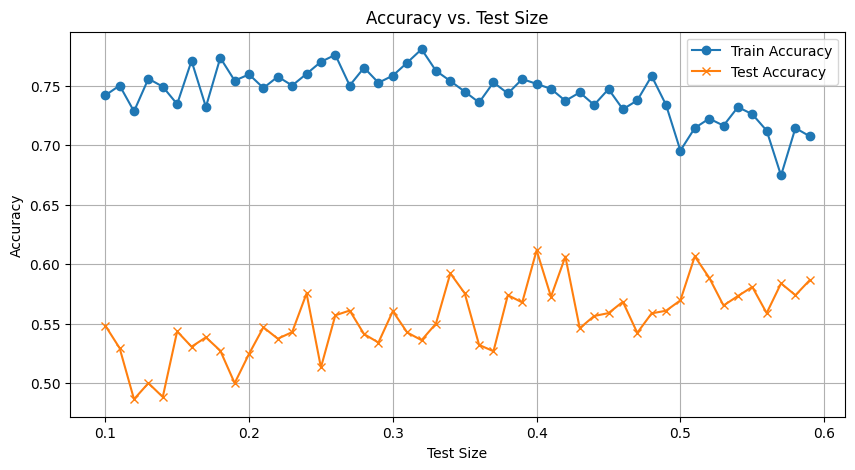

In [1]:
# 导入相关库
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归器
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split as TTS # 导入交叉验证、交叉验证评分及数据集划分
from sklearn.metrics import mean_squared_error, accuracy_score  # 导入均方误差计算的方法及准确度计算方法
import xgboost as xgb

import pandas as pd  # 导入处理数据的pandas库
import numpy as np  # 导入数值计算库Numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from time import time  # 导入时间模块中的time函数
import datetime  # 导入日期时间模块


# 读取文件
file_path = "D:\data\heart+disease\processed.cleveland.data"
data = pd.read_csv(file_path, delimiter=',')

# 替换'MissingValue'为NaN
data.replace('?', np.nan, inplace=True)
# 转换数据类型
data = data.astype(float)

# 设置特征和标签
X = data.iloc[:, :13]  # 前13列特征
y = data.iloc[:, 13]   # 第14列标签

# 定义XGBoost参数
param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.32,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.6,
    'colsample_bytree': 0.3,
    'gamma': 0,
    'lambda': 2.2,
    'alpha': 3.3,
    'eval_metric': 'logloss',
    'seed': 42
}

num_round = 85

# 测试不同的test_size
test_sizes = np.arange(0.3, 0.9, 0.01)
train_accuracies = []
test_accuracies = []

for test_size in test_sizes:
    # 随机分割训练数据集和测试数据集
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=test_size, random_state=42)

    # 转换为DMatrix，XGBoost的专用数据结构
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
    dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_train_pred = bst.predict(dtrain)
    y_test_pred = bst.predict(dtest)
    
    # 计算准确度
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 输出结果
for i, test_size in enumerate(test_sizes):
    print(f'Test size: {test_size:.2f} | Train Accuracy: {train_accuracies[i]:.4f} | Test Accuracy: {test_accuracies[i]:.4f}')

# 绘制训练准确度和测试准确度随test_size变化的图像
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_sizes, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()